# Simple Analytics of the Casual section of roleplayerguild.com
*"It's a capital mistake to theorize before one has enough data. Eventually, you'll end up twisting facts to suit theories, instead of theories to suit facts."* **—Sherlock Holmes**

In [1]:
from bs4 import BeautifulSoup as bs
import requests as rq

with rq.get('https://www.roleplayerguild.com/forums/4-casual-roleplay') as source:
    soup = bs(source.text, 'lxml')

topics = soup.find_all('a', class_='topic-title-link')
labels = soup.find_all('span', class_='label label-default')

In [2]:

with rq.get('https://www.roleplayerguild.com/roleplays') as source:
    soup_2 = bs(source.text, 'lxml')

match = soup_2.find_all('span', class_='label label-default')

tags_list = []

for item in match:
    if item.text.strip() not in tags_list:
        tags_list.append(item.text.strip())

In [3]:
tag_appearance = {}

for tag in tags_list:
    key = tag
    value = 0

    for label in labels:
        if label.text == tag:
            value += 1

    tag_appearance[key]=value

In [4]:
a, b, c = 'Tag', 'Quantity', '% of Topics with Tag'
print(f'{a:<20}\t{b:>12}\t{c:>5}')
for tag, quant in tag_appearance.items():
    percent = f'{((quant/len(topics))*100):.2f}'
    print(f'{tag:<20}\t{quant:>12}\t{percent:>20}')

Tag                 	    Quantity	% of Topics with Tag
Casual              	           0	                0.00
Small Group         	           2	                8.00
Fantasy             	          15	               60.00
18+                 	           7	               28.00
Advanced            	           4	               16.00
Military            	           5	               20.00
Steampunk           	           2	                8.00
Anime/Manga         	           5	               20.00
Medieval            	           4	               16.00
Arena               	           1	                4.00
Free                	           0	                0.00
Large Group         	          16	               64.00
Modern              	          11	               44.00
Fandom              	           9	               36.00
Superhero           	           6	               24.00
1x1                 	           0	                0.00
Sci-Fi              	           5	               20.00
Future    

In [5]:
tag_quantity = []

for tag, num in tag_appearance.items():
    tag_quantity.append(num)


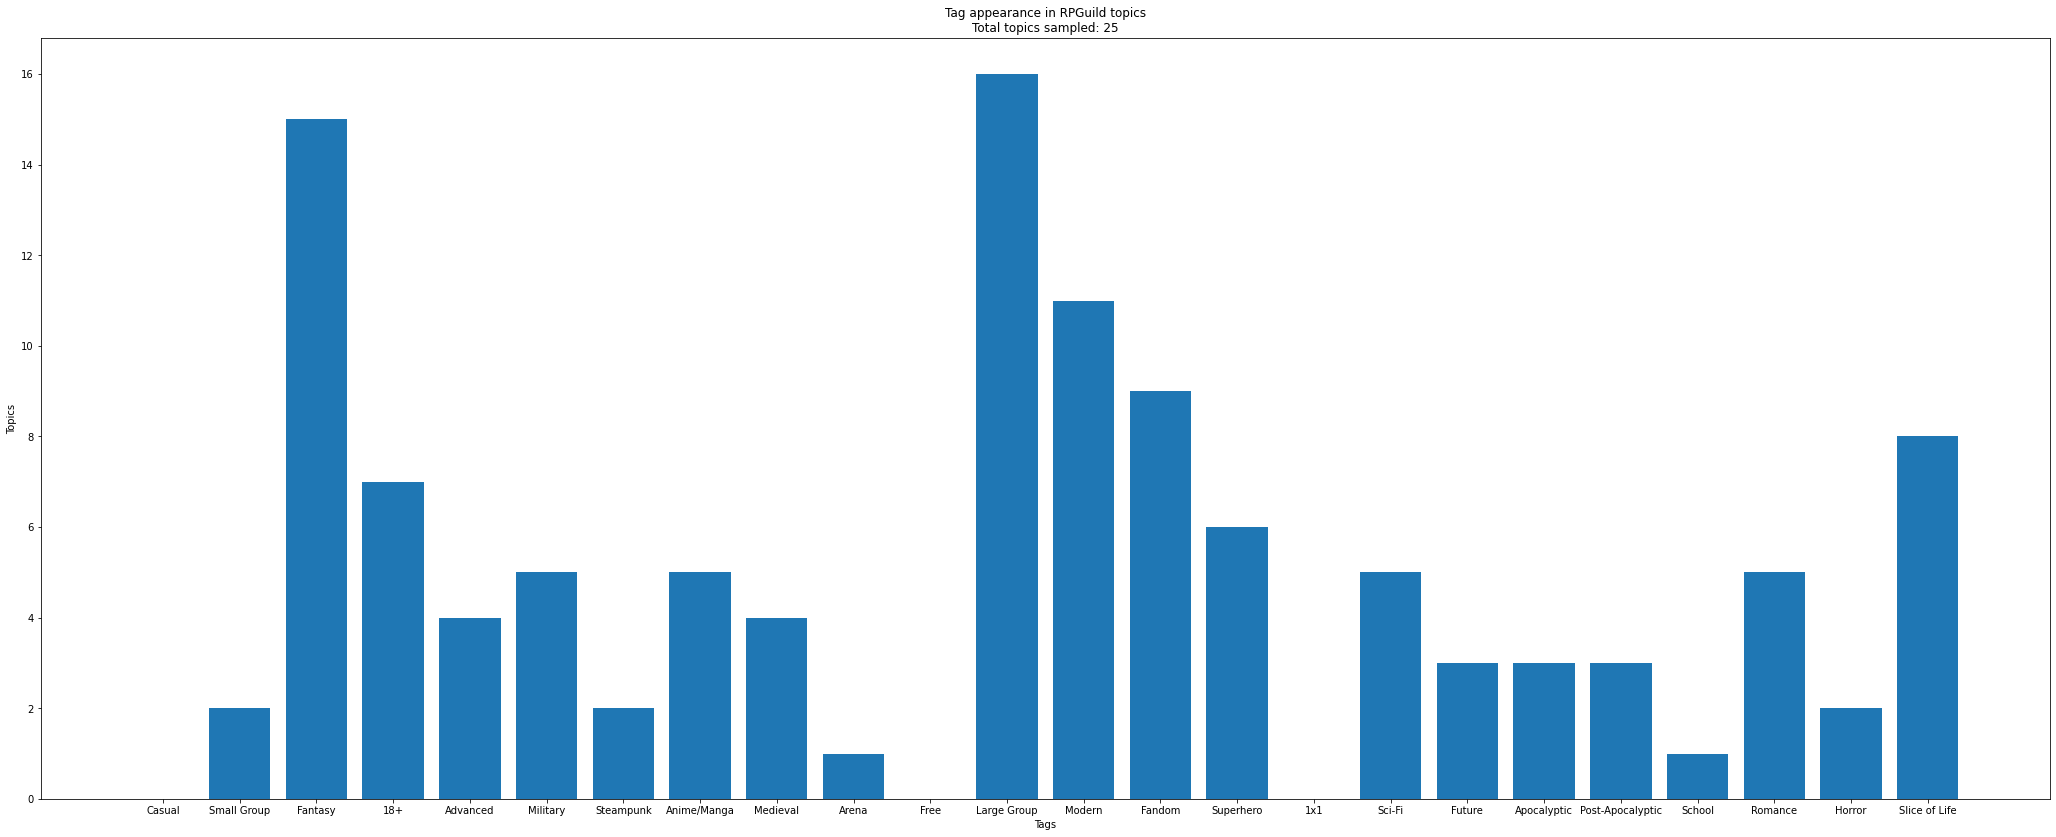

In [6]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (36, 14)
plt.title(f'Tag appearance in RPGuild topics\nTotal topics sampled: {len(topics)}')
plt.ylabel('Topics')
plt.xlabel('Tags')
plt.bar(tags_list, tag_quantity)
plt.show()